In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
from matplotlib import pyplot as plt
import seaborn as sns

# Configure pandas display options for better readability
pd.options.display.float_format = '{:.2f}'.format
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [3]:
# Load the data from the specified CSV file
df = pd.read_csv('Database/all_data.csv', encoding='iso-8859-1')

In [4]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2161 entries, 0 to 2160
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerID      2158 non-null   float64
 1   FirstName       2158 non-null   object 
 2   LastName        2158 non-null   object 
 3   City            2158 non-null   object 
 4   Country         2158 non-null   object 
 5   Phone           2158 non-null   object 
 6   OrderID         2155 non-null   float64
 7   OrderDate       2155 non-null   object 
 8   OrderNumber     2155 non-null   float64
 9   TotalAmount     2155 non-null   float64
 10  ProductID       2157 non-null   float64
 11  ProductName     2157 non-null   object 
 12  UnitPrice       2157 non-null   float64
 13  Package         2157 non-null   object 
 14  IsDiscontinued  2157 non-null   object 
 15  SupplierID      2157 non-null   float64
 16  CompanyName     2157 non-null   object 
 17  ContactName     2157 non-null   o

In [5]:
# Display a random sample of 5 rows for quick inspection
df.sample(5)

,CustomerID,FirstName,LastName,City,Country,Phone,OrderID,OrderDate,OrderNumber,TotalAmount,ProductID,ProductName,UnitPrice,Package,IsDiscontinued,SupplierID,CompanyName,ContactName,City.1,Country.1,Phone.1,Fax
1412,41.00,Annette,Roulet,Toulouse,France,61.77.61.10,540.00,12/19/2013 0:00,542917.00,2760.80,2.00,Chang,19.00,24 - 12 oz bottles,False,1.00,Exotic Liquids,Charlotte Cooper,London,UK,(171) 555-2222,NaN
1179,47.00,Felipe,Izquierdo,I. de Margarita,Venezuela,(8) 34-56-12,450.00,10/8/2013 0:00,542827.00,1073.90,19.00,Teatime Chocolate Biscuits,9.20,10 boxes x 12 pieces,False,8.00,"Specialty Biscuits, Ltd.",Peter Wilson,Manchester,UK,(161) 555-4448,NaN
914,44.00,Renate,Messner,Frankfurt a.M.,Germany,069-0245984,346.00,7/9/2013 0:00,542723.00,2493.00,20.00,Sir Rodney's Marmalade,81.00,30 gift boxes,False,8.00,"Specialty Biscuits, Ltd.",Peter Wilson,Manchester,UK,(161) 555-4448,NaN
1548,81.00,Anabela,Domingues,Sao Paulo,Brazil,(11) 555-2167,592.00,1/19/2014 0:00,542969.00,919.50,72.00,Mozzarella di Giovanni,34.80,24 - 200 g pkgs.,False,14.00,Formaggi Fortini s.r.l.,Elio Rossi,Ravenna,Italy,(0544) 60323,(0544) 60603
1857,55.00,Rene,Phillips,Anchorage,USA,(907) 555-7584,718.00,3/20/2014 0:00,543095.00,848.00,51.00,Manjimup Dried Apples,53.00,50 - 300 g pkgs.,False,24.00,"G'day, Mate",Wendy Mackenzie,Sydney,Australia,(02) 555-5914,(02) 555-4873


In [6]:
# Check for rows with missing OrderID values
df[df['OrderID'].isnull()]

,CustomerID,FirstName,LastName,City,Country,Phone,OrderID,OrderDate,OrderNumber,TotalAmount,ProductID,ProductName,UnitPrice,Package,IsDiscontinued,SupplierID,CompanyName,ContactName,City.1,Country.1,Phone.1,Fax
2155,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.00,Stroopwafels,9.75,24 pieces,False,22.00,Zaanse Snoepfabriek,Dirk Luchte,Zaandam,Netherlands,(12345) 1212,(12345) 1210
2156,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.00,DataScience,50.00,1,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2157,92.00,Ali,Ali,Cairo,Egypt,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2158,22.00,Diego,Roel,Madrid,Spain,(91) 555 94 44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2159,57.00,Marie,Bertrand,Paris,France,(1) 42.34.22.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.00,DSClub,AEmad,Alex,Egypt,11111,11111


In [7]:
# Drop rows where OrderID is missing, as they are likely invalid
df.dropna(subset=['OrderID'], inplace=True)

In [8]:
# Rename columns for better clarity and consistency
df.rename(columns={'City.1': 'SuppCity', 'Country.1': 'SuppCountry', 'Phone.1': 'SuppPhone'}, inplace=True)

In [9]:
# Convert OrderDate to datetime format for easier manipulation
df['OrderDate'] = pd.to_datetime(df['OrderDate'])

In [10]:
# Convert columns containing 'ID' or 'OrderNumber' to integer type for consistency
for col in df.columns:
    if 'ID' in col or 'OrderNumber' in col:
        df[col] = df[col].astype(int)

In [11]:
# Verify the changes made to the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2155 entries, 0 to 2154
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   CustomerID      2155 non-null   int64         
 1   FirstName       2155 non-null   object        
 2   LastName        2155 non-null   object        
 3   City            2155 non-null   object        
 4   Country         2155 non-null   object        
 5   Phone           2155 non-null   object        
 6   OrderID         2155 non-null   int64         
 7   OrderDate       2155 non-null   datetime64[ns]
 8   OrderNumber     2155 non-null   int64         
 9   TotalAmount     2155 non-null   float64       
 10  ProductID       2155 non-null   int64         
 11  ProductName     2155 non-null   object        
 12  UnitPrice       2155 non-null   float64       
 13  Package         2155 non-null   object        
 14  IsDiscontinued  2155 non-null   object        
 15  SupplierI

## EDA

#### Univariate Analysis

In [12]:
df['TotalAmount'].describe()

count    2155.00
mean     1986.04
std      2121.85
min        12.50
25%       670.80
50%      1419.80
75%      2393.50
max     17250.00
Name: TotalAmount, dtype: float64

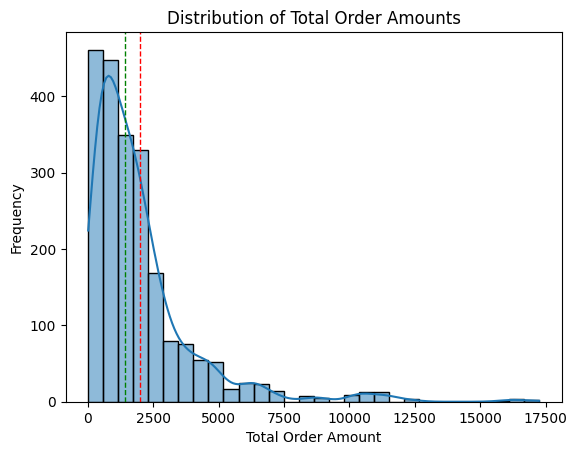

In [13]:
sns.histplot(data=df, x='TotalAmount', bins=30, kde=True)
plt.title('Distribution of Total Order Amounts')
plt.xlabel('Total Order Amount')
plt.ylabel('Frequency')
plt.axvline(df['TotalAmount'].mean(), color='red', linestyle='dashed', linewidth=1)
plt.axvline(df['TotalAmount'].median(), color='green', linestyle='dashed', linewidth=1)
plt.show()

In [14]:
min_amount = df['TotalAmount'].min()
max_amount = df['TotalAmount'].max()

q1 = df['TotalAmount'].quantile(0.25)
q3 = df['TotalAmount'].quantile(0.75)
q2 = df['TotalAmount'].median()

iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

Text(0.5, 1.0, 'Boxplot of Total Order Amounts')

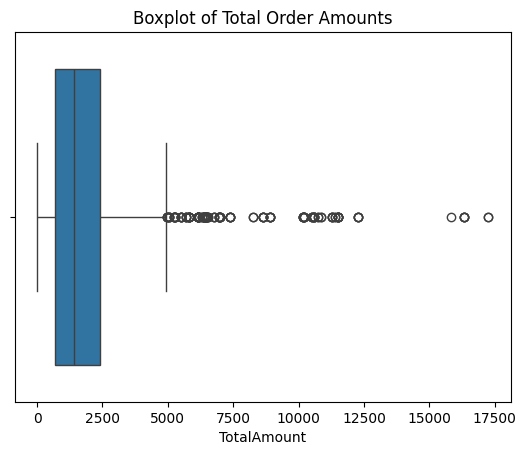

In [15]:
sns.boxplot(data=df, x='TotalAmount')
plt.title('Boxplot of Total Order Amounts')

In [16]:
df = df[df['TotalAmount']<15000]

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2148 entries, 0 to 2154
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   CustomerID      2148 non-null   int64         
 1   FirstName       2148 non-null   object        
 2   LastName        2148 non-null   object        
 3   City            2148 non-null   object        
 4   Country         2148 non-null   object        
 5   Phone           2148 non-null   object        
 6   OrderID         2148 non-null   int64         
 7   OrderDate       2148 non-null   datetime64[ns]
 8   OrderNumber     2148 non-null   int64         
 9   TotalAmount     2148 non-null   float64       
 10  ProductID       2148 non-null   int64         
 11  ProductName     2148 non-null   object        
 12  UnitPrice       2148 non-null   float64       
 13  Package         2148 non-null   object        
 14  IsDiscontinued  2148 non-null   object        
 15  SupplierI

In [18]:
px.bar(data_frame=df['City'].value_counts(), title='Number of Orders by City')

In [19]:
# Plot the number of orders by country
px.bar(data_frame=df['Country'].value_counts(), title='Number of Orders by Country')

# Conclusion: This chart provides insights into the countries with the highest order volumes.

In [20]:
px.pie(data_frame=df, names='Country', title='Percentage of Orders by Country') 

## Bivariate Analysis

#### Countries vs Total Amount

In [21]:
df.groupby('Country')['TotalAmount'].sum().sort_values(ascending=False)

Country
USA           860856.27
Germany       776131.96
Austria       492686.70
Brazil        294433.59
France        261737.31
Venezuela     179496.89
Sweden        174999.55
UK            171228.89
Canada        161234.00
Ireland       156949.88
Denmark       118828.50
Belgium       117037.96
Switzerland    92442.02
Mexico         70401.10
Finland        58352.05
Spain          51273.63
Italy          40471.15
Portugal       35222.95
Argentina      22774.90
Norway         19125.90
Poland          8624.65
Name: TotalAmount, dtype: float64

In [22]:
import pandas as pd
import plotly.express as px

def plots(column, top10=False):
    """
    Generates bar and pie charts for the total amount grouped by a specified column.

    Parameters:
        column (str): The column to group by.
        top10 (bool): If True, only the top 10 groups are displayed.
    """
    # Check if the column exists in the DataFrame
    if column not in df.columns:
        print(f"Error: Column '{column}' does not exist in the dataset.")
        return

    # Group by the specified column and calculate the total amount
    prop = df.groupby(column)['TotalAmount'].sum().reset_index()
    prop['proportion'] = (prop['TotalAmount'] / prop['TotalAmount'].sum()) * 100

    # Sort by total amount in descending order
    prop = prop.sort_values(by='TotalAmount', ascending=False)

    # Print descriptive statistics for TotalAmount
    print("Descriptive statistics for TotalAmount:")
    print(df['TotalAmount'].describe())

    # If top10 is True, select only the top 10 groups
    if top10:
        prop = prop.head(10)

    # Generate a bar chart
    fig1 = px.bar(
        data_frame=prop,
        x=column,
        y='TotalAmount',
        title=f'Total Amount by {column}',
        text='TotalAmount',
        labels={column: column, 'TotalAmount': 'Total Amount'}
    )
    fig1.update_traces(texttemplate='%{text:.2s}', textposition='outside')

    # Generate a pie chart
    fig2 = px.pie(
        data_frame=prop,
        names=column,
        values='TotalAmount',
        title=f'Percentage of Total Amount by {column}',
        labels={column: column, 'TotalAmount': 'Total Amount'}
    )

    # Show the plots
    fig1.show()
    fig2.show()

In [23]:
plots('City', top10=True)

Descriptive statistics for TotalAmount:
count    2148.00
mean     1938.69
std      1955.96
min        12.50
25%       670.00
50%      1414.80
75%      2385.73
max     12281.20
Name: TotalAmount, dtype: float64


#### Orders Date vs Total Amount

In [24]:
date_total = df[['OrderDate', 'TotalAmount']]
date_total = date_total.set_index('OrderDate')

In [25]:
px.line(data_frame=date_total, title='Total Amount Over Time')

#### Oder Date vs Country

In [34]:
# Ensure 'OrderDate' is in datetime format
df['OrderDate'] = pd.to_datetime(df['OrderDate'])

# Select relevant columns and set 'OrderDate' as the index
date_country = df[['OrderDate', 'Country']].set_index('OrderDate')

# Resample by month-end ('ME') and aggregate unique countries into a list
date_country = date_country.resample('ME')['Country'].nunique()

# Display the first few rows of the result
date_country.head()

OrderDate
2012-07-31    11
2012-08-31    11
2012-09-30    11
2012-10-31    13
2012-11-30    11
Freq: ME, Name: Country, dtype: int64

In [35]:
px.line(data_frame=date_country, title='Number of Countries Ordering Over Time')